# Creating a train and test sampling set

In machine learning, it's important to establish a sampling set to be used to train an algorithm and a completely separate set for testing how well that algorithm performs. If the same sampling points were used for training and testing then the model would already be modeled to predict or classify the values we feed in to test it, and that would not be a very good indicator of the model's accuracy. 


__Training set:__ The data set that will be used to fit a model.

__Testing set:__ The data set that will be used to assess a model's performance.

Appropriate data splitting is important to avoid over-fitting or creating a training set that does not accurately represent the population distribution. Here we will break down a couple different strategies for data splitting:
* Simple random sampling (SRS)
* Trial-and-error methods
* Systematic sampling
* Convenience sampling
* CADEX, DUPLEX
* Stratified sampling

We'll use some pre-cleaned, stock data from Vega for our demonstration.

If you have not used Vega before:

    $ pip install vega-datasets

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
from vega_datasets import data
stocks = data.stocks()

Vega offers a description of the data:

In [3]:
data.stocks.description

'Daily closing stock prices for AAPL, AMZN, GOOG, IBM, and MSFT between 2000 and 2010.'

Lets see what the data looks like:

In [4]:
stocks.head()

,symbol,date,price
0,MSFT,2000-01-01,39.81
1,MSFT,2000-02-01,36.35
2,MSFT,2000-03-01,43.22
3,MSFT,2000-04-01,28.37
4,MSFT,2000-05-01,25.45


Look at the data types:

In [5]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 3 columns):
symbol    560 non-null object
date      560 non-null datetime64[ns]
price     560 non-null float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 13.2+ KB


We'll pivot this data so that the symbols are the columns, just to use the description functions:

In [6]:
stockPiv = stocks.pivot(index='date', columns='symbol', values='price')

In [7]:
stockPiv.head()

symbol,AAPL,AMZN,GOOG,IBM,MSFT
date,,,,,
2000-01-01,25.94,64.56,NaN,100.52,39.81
2000-02-01,28.66,68.87,NaN,92.11,36.35
2000-03-01,33.95,67.00,NaN,106.11,43.22
2000-04-01,31.01,55.19,NaN,99.95,28.37
2000-05-01,21.00,48.31,NaN,96.31,25.45


This created some NULL values, let's keep that in mind for now but continue exploring the data:

In [8]:
stockPiv.isna().sum()

symbol
AAPL     0
AMZN     0
GOOG    55
IBM      0
MSFT     0
dtype: int64

In [9]:
stockPiv.describe()

symbol,AAPL,AMZN,GOOG,IBM,MSFT
count,123.000000,123.000000,68.000000,123.000000,123.000000
mean,64.730488,47.987073,415.870441,91.261220,24.736748
std,63.123782,28.891321,135.069851,16.513365,4.303958
min,7.070000,5.970000,102.370000,53.010000,15.810000
25%,11.155000,29.405000,338.395000,77.365000,21.760000
50%,36.810000,41.500000,420.460000,88.700000,24.110000
75%,102.460000,65.895000,503.625000,101.945000,27.295000
max,223.020000,135.910000,707.000000,130.320000,43.220000


And a simple histogram to get a better picture of the distribution:

In [10]:
import matplotlib.pyplot as plt
stockPiv.hist(figsize=(20,15))
plt.show()

<Figure size 2000x1500 with 6 Axes>

### Simple random sampling (SRS)

In [11]:
# create a random array of numbers the length of our dataset
randomList = np.random.permutation(len(stocks))

# Define the size of test set, we will only take 10% of the sample for testing
testSize = int(len(stocks) * 0.1)

# Pull numbers from the random list for the size of our test set
test = stocks.iloc[randomList[:testSize]]

# Use the rest of the list for the train set
train = stocks.iloc[randomList[testSize:]]

print('Size of train: {} and size of test: {}'.format(len(train), len(test)))

Size of train: 504 and size of test: 56


What does our training set look like?

In [12]:
train.head()

,symbol,date,price
140,AMZN,2001-06-01,14.15
321,IBM,2006-04-01,77.05
117,MSFT,2009-10-01,27.48
274,IBM,2002-05-01,72.97
220,AMZN,2008-02-01,64.47


If we pivot are we seeing a similar distribution?

In [13]:
trainPiv = train.pivot(index='date', columns='symbol', values='price')

In [17]:
stockPiv.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
symbol,,,,,,,,
AAPL,123.0,64.730488,63.123782,7.07,11.155,36.81,102.460,223.02
AMZN,123.0,47.987073,28.891321,5.97,29.405,41.50,65.895,135.91
GOOG,68.0,415.870441,135.069851,102.37,338.395,420.46,503.625,707.00
IBM,123.0,91.261220,16.513365,53.01,77.365,88.70,101.945,130.32
MSFT,123.0,24.736748,4.303958,15.81,21.760,24.11,27.295,43.22


In [16]:
trainPiv.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
symbol,,,,,,,,
AAPL,111.0,63.649099,60.844472,7.11,11.170,36.81,102.460,204.62
AMZN,110.0,48.880909,29.910995,5.97,27.340,42.70,68.755,135.91
GOOG,63.0,421.369206,136.821068,102.37,360.990,432.66,508.375,707.00
IBM,110.0,91.981364,16.539573,53.01,77.485,89.71,102.945,130.32
MSFT,110.0,24.871636,4.370770,15.81,21.910,24.21,27.240,43.22


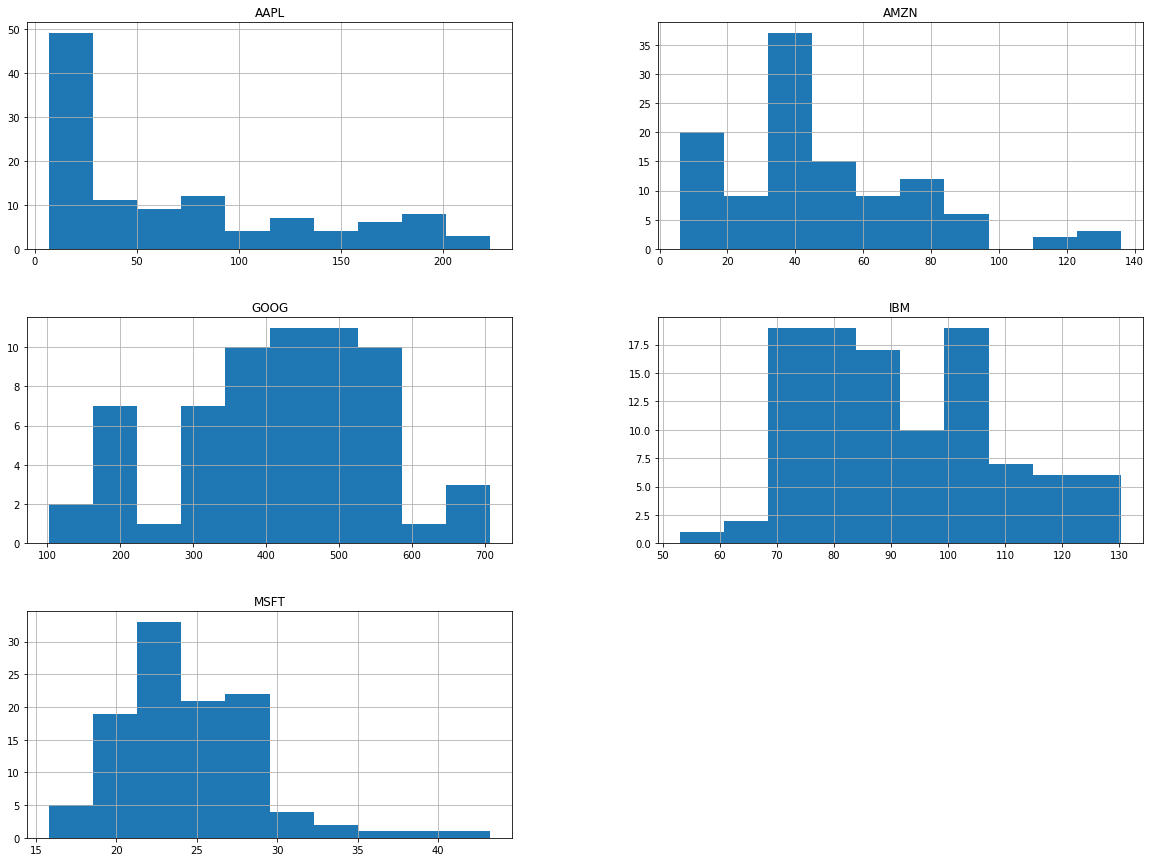

In [15]:
trainPiv.hist(figsize=(20,15))
plt.show()

The train set is is a little off, but very close. 

sklearn offers a simple random data splitter that can be implemented in one line:

In [19]:
from sklearn.model_selection import train_test_split

sk_train, sk_test = train_test_split(stocks, test_size=0.2, random_state=42)

In [20]:
sk_trainPiv = sk_train.pivot(index='date', columns='symbol', values='price')

In [21]:
stockPiv.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
symbol,,,,,,,,
AAPL,123.0,64.730488,63.123782,7.07,11.155,36.81,102.460,223.02
AMZN,123.0,47.987073,28.891321,5.97,29.405,41.50,65.895,135.91
GOOG,68.0,415.870441,135.069851,102.37,338.395,420.46,503.625,707.00
IBM,123.0,91.261220,16.513365,53.01,77.365,88.70,101.945,130.32
MSFT,123.0,24.736748,4.303958,15.81,21.760,24.11,27.295,43.22


In [22]:
sk_trainPiv.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
symbol,,,,,,,,
AAPL,99.0,62.668990,61.954178,7.07,10.8300,36.060,92.790,223.02
AMZN,97.0,49.895979,29.533431,5.97,30.1200,43.280,68.870,135.91
GOOG,58.0,419.690000,135.531174,102.37,350.8850,420.460,510.915,707.00
IBM,102.0,92.031373,16.479071,53.01,77.9300,89.720,102.945,130.32
MSFT,92.0,24.475543,4.192087,16.63,21.5525,23.765,26.935,39.81


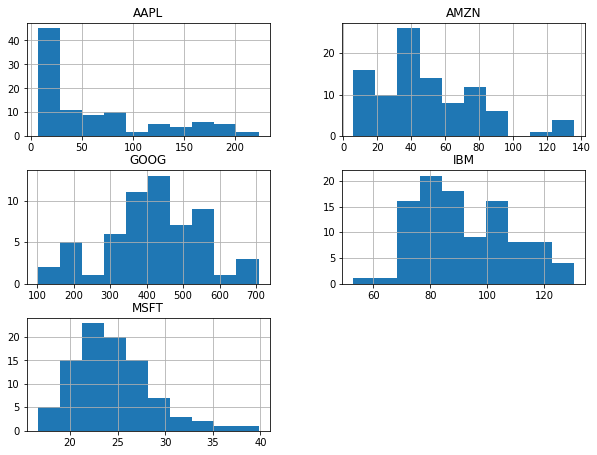

In [23]:
sk_trainPiv.hist(figsize=(10,7.5))
plt.show()